# AuNR DA Figure S3

In [20]:
import sys
# add path for my packages
sys.path.append('./datasets')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

%precision 3
%matplotlib inline

# use my matplotlib style
plt.style.use('./datasets/my_rc_setting.mplstyle')

## input data

In [22]:
glass_data = pd.read_csv('./datasets/090723_glass_training.csv')
glass_data = glass_data.drop(['R2'], axis=1)
original_data = pd.read_csv('./datasets/New_SPP.csv')
original_data = original_data[(original_data['width'] < 60) & (original_data['length'] < 130)]

combined_data = pd.concat([glass_data, original_data], axis=0)
combined_data['volume'] = np.pi*(combined_data['width']**2)*combined_data['length']/4 - np.pi*(combined_data['width']**3)/12
combined_data['ratio'] = combined_data['length'] / combined_data['width']

combined_data = combined_data[(combined_data['width'] < 60) & (combined_data['length'] < 130)]
combined_data = combined_data.reset_index(drop=True)
print(combined_data.shape)

# all ITO data
ito_data = pd.read_csv('./datasets/111623_ito_training.csv')
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)
print(ito_data.shape)

(1701, 7)
(3292, 6)


In [23]:
exp_ito_data = pd.read_csv('./datasets/100323_ZJ_exp_ito_final.csv')
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)
print(exp_ito_data.shape)

exp_ito_data = exp_ito_data[(exp_ito_data['length'] > 75) & (exp_ito_data['length'] < 100)] 
exp_ito_data = exp_ito_data[(exp_ito_data['width'] > 27) & (exp_ito_data['width'] < 32)] 
exp_ito_data = exp_ito_data.reset_index(drop=True)
print(exp_ito_data.shape)

(148, 11)
(106, 11)


In [24]:
exp_data1 = pd.read_csv('./datasets/121324_Zhenyang_exp_al2o3_1.csv')
exp_data2 = pd.read_csv('./datasets/121324_Zhenyang_exp_al2o3_2.csv')
# convert str into list after reading csv
exp_data1['exp_ene'] = [ast.literal_eval(df) for df in exp_data1['exp_ene']]
exp_data1['exp_dfs'] = [ast.literal_eval(df) for df in exp_data1['exp_dfs']]
exp_data1['fitting'] = [ast.literal_eval(df) for df in exp_data1['fitting']]
exp_data2['exp_ene'] = [ast.literal_eval(df) for df in exp_data2['exp_ene']]
exp_data2['exp_dfs'] = [ast.literal_eval(df) for df in exp_data2['exp_dfs']]
exp_data2['fitting'] = [ast.literal_eval(df) for df in exp_data2['fitting']]

exp_data1 = exp_data1.drop(8)
print(exp_data1.shape, exp_data2.shape)
exp_al2o3_data = pd.concat([exp_data1, exp_data2], axis=0, ignore_index=True)
print(exp_al2o3_data.shape)

(43, 11) (21, 11)
(64, 11)


## Final plot

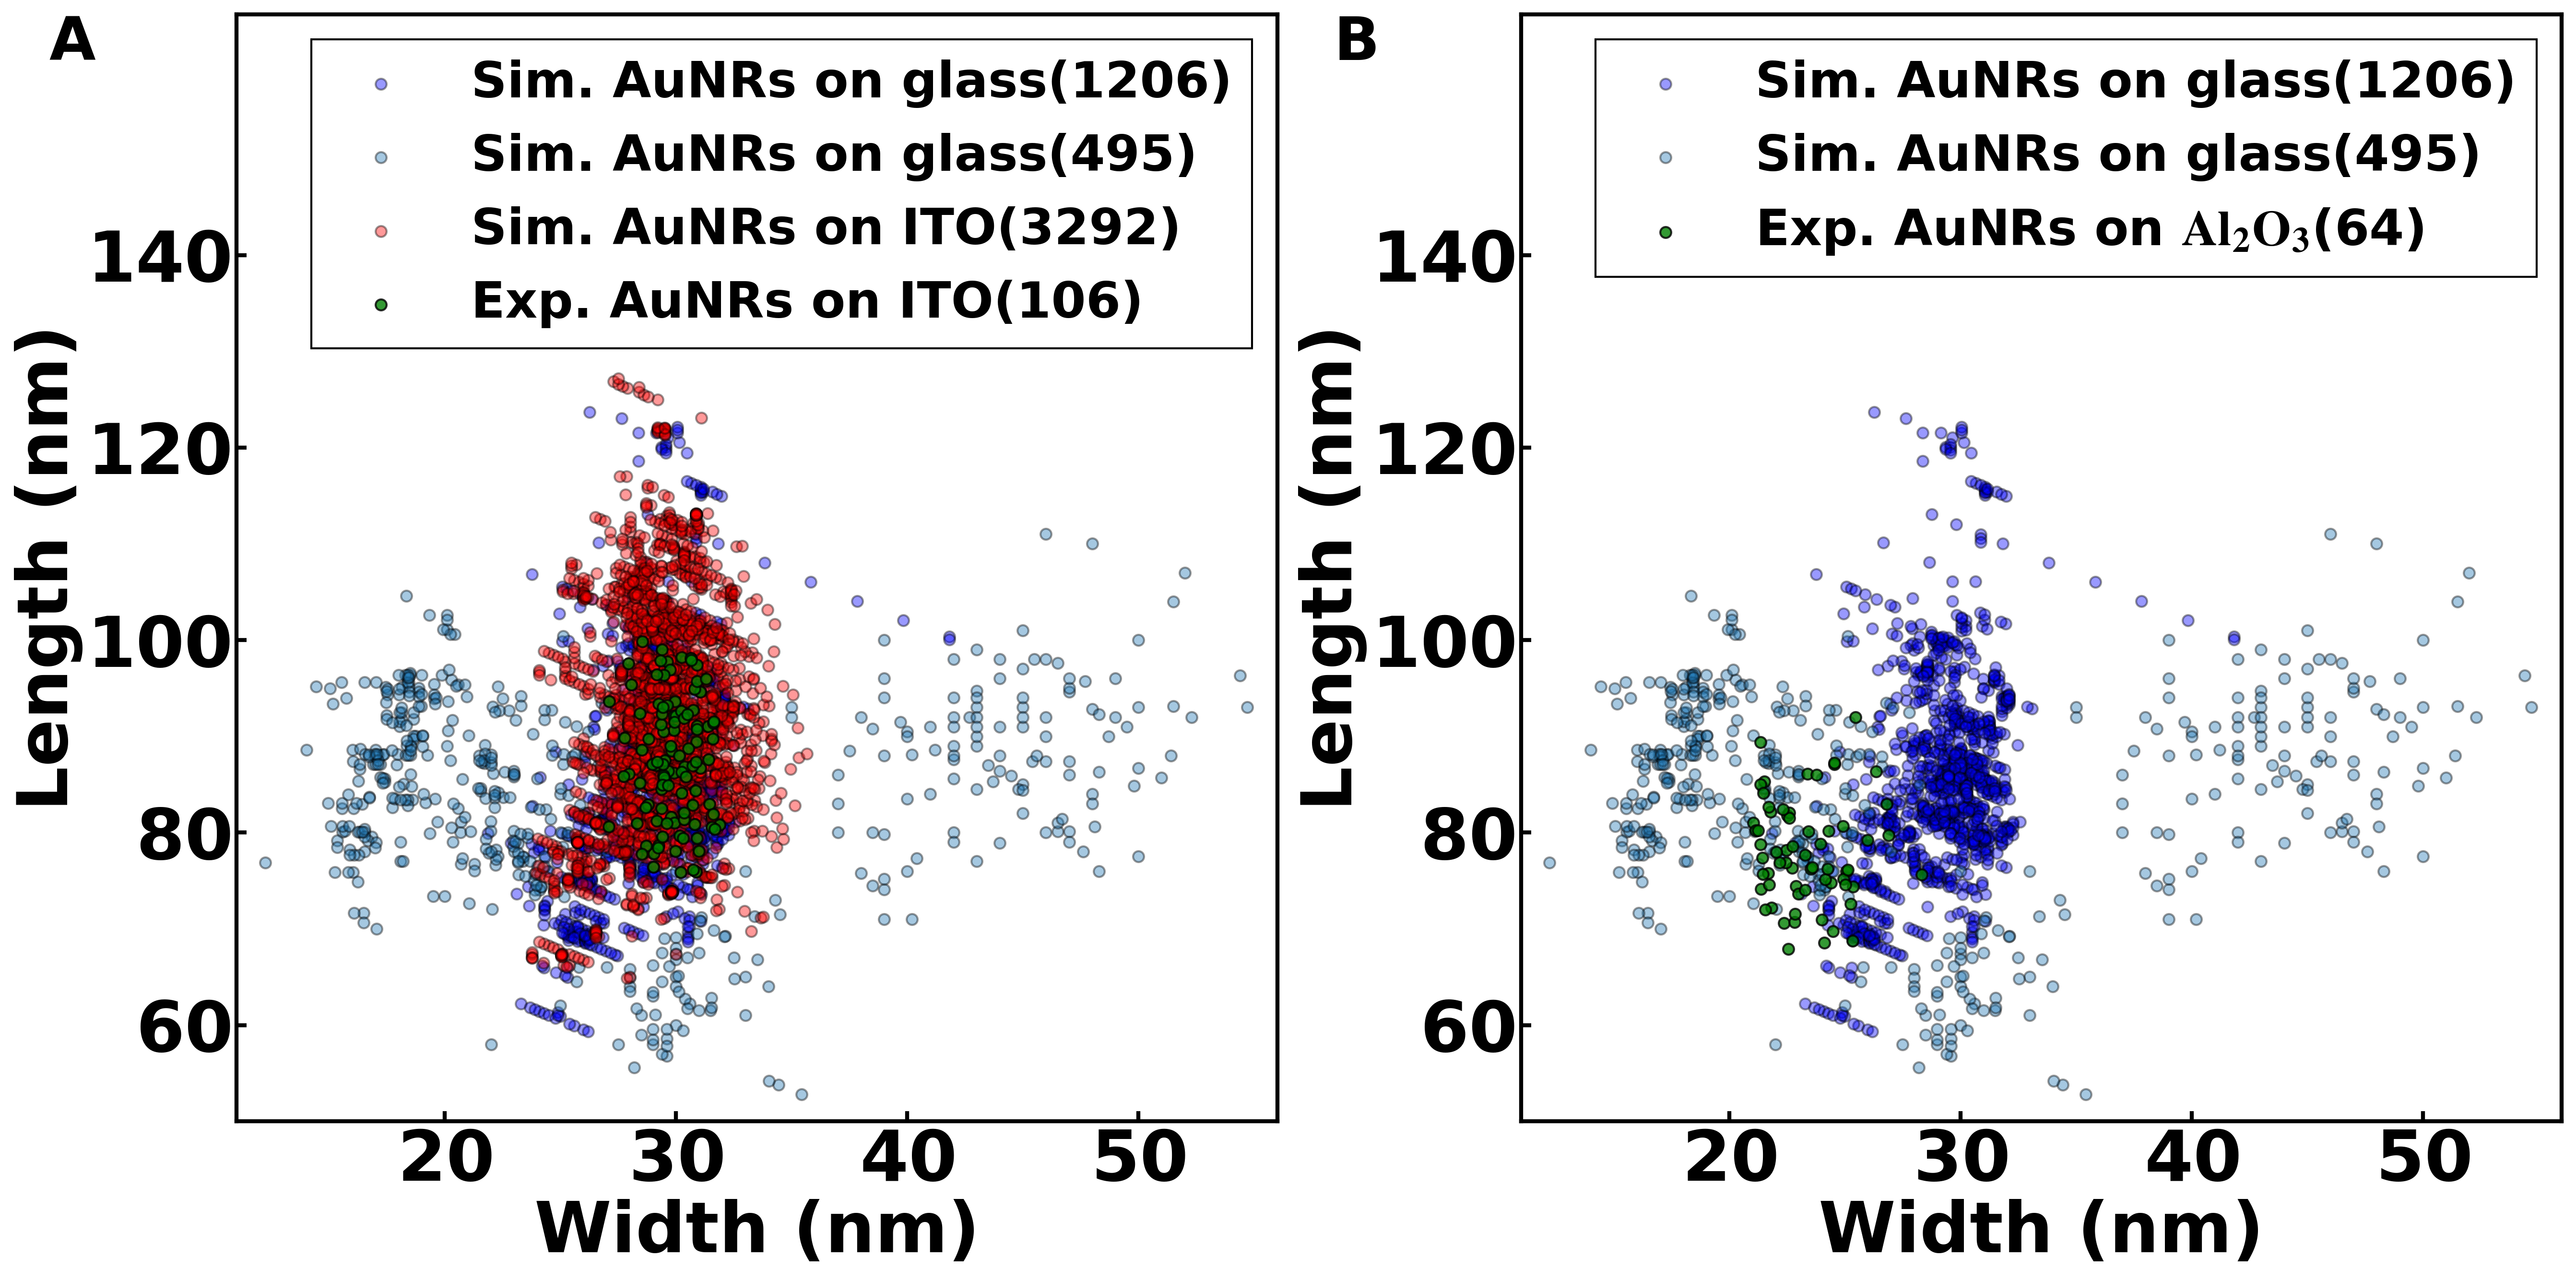

In [25]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), dpi=300)

ax1.scatter(glass_data['width'], glass_data['length'], s=30, c='b', edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on glass({glass_data.shape[0]})')
ax1.scatter(original_data['width'], original_data['length'], s=30, edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on glass({original_data.shape[0]})')

ax1.scatter(ito_data['width'], ito_data['length'], s=30, c='r', edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on ITO({ito_data.shape[0]})')
ax1.scatter(exp_ito_data['width'], exp_ito_data['length'], s=30, c='g', edgecolor='k', alpha=0.8, label=f'Exp. AuNRs on ITO({exp_ito_data.shape[0]})')

ax1.set_xlabel('Width (nm)', fontsize=35)
ax1.set_ylabel('Length (nm)', fontsize=35)
ax1.set_yticks([60, 80, 100, 120, 140])
ax1.set_xticks([20, 30, 40, 50])
ax1.set_xlim(11, 56)
ax1.set_ylim(50, 165)
ax1.tick_params(axis='both', labelsize=35, pad=3)
ax1.legend(loc='upper right', fontsize=25)
ax1.text(-0.18, 1, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ax2.scatter(glass_data['width'], glass_data['length'], s=30, c='b', edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on glass({glass_data.shape[0]})')
ax2.scatter(original_data['width'], original_data['length'], s=30, edgecolor='k', alpha=0.4, label=f'Sim. AuNRs on glass({original_data.shape[0]})')

ax2.scatter(exp_al2o3_data['width'], exp_al2o3_data['length'], s=30, c='g', edgecolor='k', alpha=0.8, label=f'Exp. AuNRs on $\\mathrm{{Al_2O_3}}$({exp_al2o3_data.shape[0]})')

ax2.set_xlabel('Width (nm)', fontsize=35)
ax2.set_ylabel('Length (nm)', fontsize=35)
ax2.set_xticks([20, 30, 40, 50])
ax2.set_yticks([60, 80, 100, 120, 140])
ax2.set_xlim(11, 56)
ax2.set_ylim(50, 165)
ax2.tick_params(axis='both', labelsize=35, pad=3)
ax2.legend(loc='upper right', fontsize=25)
ax2.text(-0.18, 1, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)
# Save the figure
# plt.savefig("AuNR_DA_figureS3.png", dpi=300, bbox_inches='tight')

In [26]:
print(exp_al2o3_data['width'].mean(), exp_al2o3_data['width'].std())
print(exp_al2o3_data['length'].mean(), exp_al2o3_data['length'].std())

23.34799375 1.6693955039270187
77.98992812499999 5.353376002304862


In [27]:
glass_data['ratio'] = glass_data['length'] / glass_data['width']

In [28]:
print(glass_data['ratio'].min(), glass_data['ratio'].max())

2.2507374631268435 4.707270650932623
